In [1]:
from app.dotenv import base_dir, data_dir
from app.load_data import *
from app.object_detection.cropROI import *


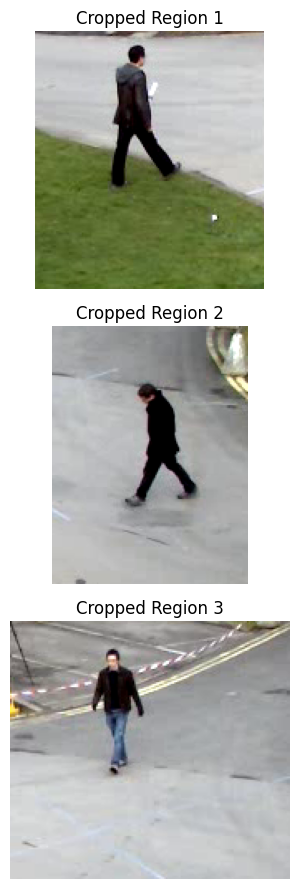

In [2]:
cropped_regions = loadImagesList(save_path = f'{data_dir}\\ROIs')
plotCrop(cropped_regions)

#### yolo v5

save model to file

In [5]:

from app.object_detection.yolo import saveYOLOv5Model, saveYOLOv8Model

saveYOLOv5Model(data_dir)
saveYOLOv8Model(data_dir)







Using cache found in C:\Users\yili0901/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-5 Python-3.11.6 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model weights saved to c:\code\identify_static_video_changes\data/yolov5s_weights.pt
Model weights saved to c:\code\identify_static_video_changes\data/yolov8s_weights.pt


load model from file

In [ ]:

from app.object_detection.yolo import loadYOLOv5Model, loadYOLOv8Model
# model = loadYOLOv5Model(data_dir)
model = loadYOLOv8Model(data_dir)


# Example inference
imgs = cropped_regions

# results = model(imgs)  # Replace with your image path

Model weights loaded successfully

0: 640x640 1 person, 147.0ms
1: 640x640 1 person, 147.0ms
2: 640x640 1 person, 1 car, 147.0ms
Speed: 3.7ms preprocess, 147.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


In [16]:

# # results.save()  # Save the results
# # results.print()  # Print the results

# # AttributeError: 'list' object has no attribute 'save'

# # Iterate through the results to save and print each one
# for i, result in enumerate(results):
#     # Save the result
#     result.save(f'{i}')  # Specify save directory if needed
#     # Print the result
#     print(f"Result for image {i + 1}:")
#     print(result)
#     df = result.pandas().xyxy  # Convert to pandas DataFrame (bounding box format: xmin, ymin, xmax, ymax)
#     print(f"Results for image {i + 1}:")
#     print(df)

In [ ]:
import pandas as pd



all_results = inferenceYOLOv8Model(model)

# # Convert the results list to a DataFrame
# df = pd.DataFrame(all_results)

# Print the DataFrame
# print(df.head())
all_results


0: 640x576 1 person, 147.8ms
Speed: 5.0ms preprocess, 147.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 576)

0: 640x512 1 person, 116.3ms
Speed: 2.2ms preprocess, 116.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)

0: 608x640 1 person, 137.4ms
Speed: 2.0ms preprocess, 137.4ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 640)


[{'confidence': array(      0.895, dtype=float32),
  'class': 0,
  'name': 'person'},
 {'confidence': array(    0.88727, dtype=float32),
  'class': 0,
  'name': 'person'},
 {'confidence': array(    0.92863, dtype=float32),
  'class': 0,
  'name': 'person'}]

In [14]:
df

,image,xmin,ymin,xmax,ymax,confidence,class,name
0,"[[[85, 78, 81], [82, 75, 78], [78, 71, 74], [7...",46.10493,8.442444,90.58266,99.769135,0.89499986,0,person
1,"[[[171, 172, 175], [172, 173, 176], [172, 173,...",49.422718,38.144257,96.686226,120.66614,0.8872712,0,person
2,"[[[40, 36, 30], [128, 124, 118], [148, 144, 13...",49.10714,16.532078,80.81857,91.0887,0.92862946,0,person


infer images

In [ ]:
imgs = cropped_regions

# Inference
model = loadYOLOv8Model(data_dir)
results = model(imgs[0])
results




In [ ]:
results

In [ ]:
# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

In [ ]:




# import cv2
# import numpy as np
# from ultralytics import YOLO

# # Load the pretrained YOLO model
# model = YOLO('yolov5s.pt')  # Using YOLOv5s for this example


import cv2
import numpy as np
from ultralytics import YOLO
import shutil  # For saving the weights to a custom location

# Define your desired path for saving the weights
custom_weights_path = f"{data_dir}/yolov5s_custom.pt"

# Load the pretrained YOLO model (this will download weights if not already available)
model = YOLO('yolov5s.pt')

# Save the model weights to the specified location
original_weights_path = model.model.yaml.get('weights')  # Default weights path
shutil.copy(original_weights_path, custom_weights_path)
print(f"Weights saved to {custom_weights_path}")

# Load the model using weights from the custom local address
custom_model = YOLO(custom_weights_path)
print("Custom model loaded successfully.")

